In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

In [2]:
data=pd.read_excel('University advancement dataset.xlsx',sheet_name="Sheet1")
data

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,NaN,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,NaN,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,NaN,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,NaN,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,NaN,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,NaN,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,NaN,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,NaN,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,NaN,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID Number                       50000 non-null  int64  
 1   Title                           2490 non-null   object 
 2   Preferred Language              50000 non-null  object 
 3   Gender                          50000 non-null  object 
 4   Relationship Types              50000 non-null  object 
 5   Faculty of Graduation           50000 non-null  object 
 6   Year of Graduation              50000 non-null  int64  
 7   Province                        50000 non-null  object 
 8   Lifetime Giving                 50000 non-null  int64  
 9   Year of Last Gift               16086 non-null  float64
 10  Year of First Gift              16086 non-null  float64
 11  Largest Gift                    16088 non-null  float64
 12  Events Attended in Lifetime     

In [4]:
data.describe(include='all')

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
count,50000.000000,2490,50000,50000,50000,50000,50000.000000,50000,5.000000e+04,16086.000000,16086.000000,1.608800e+04,50000.000000,50000,50000.000000,50000.000000
unique,NaN,3,3,3,21,25,NaN,12,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,President,E,F,Graduate,Arts -- General,NaN,ON,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN
freq,NaN,1492,32240,26807,46487,16601,NaN,16631,NaN,NaN,NaN,NaN,NaN,45372,NaN,NaN
mean,125000.500000,NaN,NaN,NaN,NaN,NaN,1985.034260,NaN,4.782636e+03,1991.617058,1985.618737,6.856570e+03,7.496000,NaN,1.285700,12.105340
std,14433.901067,NaN,NaN,NaN,NaN,NaN,20.880956,NaN,1.371378e+05,17.985134,18.413239,6.143246e+04,4.592259,NaN,1.160578,6.860629
min,100001.000000,NaN,NaN,NaN,NaN,NaN,1929.000000,NaN,0.000000e+00,1934.000000,1933.000000,0.000000e+00,0.000000,NaN,0.000000,0.000000
25%,112500.750000,NaN,NaN,NaN,NaN,NaN,1970.000000,NaN,0.000000e+00,1979.000000,1972.000000,5.300000e+01,4.000000,NaN,0.000000,6.000000
50%,125000.500000,NaN,NaN,NaN,NaN,NaN,1989.000000,NaN,0.000000e+00,1995.000000,1988.000000,5.020000e+02,8.000000,NaN,1.000000,13.000000
75%,137500.250000,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,1.050000e+02,2007.000000,2001.000000,6.259500e+03,11.000000,NaN,2.000000,18.000000


In [5]:
data_wt=data.drop('Title',axis=1)
data_wt #dataframe without Title column

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


In [6]:
data_english=data[data['Preferred Language']=='E']
data_english
#Dataframe for english speakers

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,NaN,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,NaN,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,NaN,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
4,100005,NaN,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
5,100006,NaN,E,M,Graduate,Engineer -- General,1969,SK,1890,1970.0,1968.0,1115.0,15,N,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,NaN,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,NaN,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,NaN,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,NaN,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


In [7]:
data_french=data[data['Preferred Language']=='F']
data_french
#dataframe for french speakers

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
14,100015,NaN,F,F,Graduate,Arts -- General,1965,NB,45740,1979.0,1978.0,1372.0,9,N,0,15
47,100048,NaN,F,F,Graduate,Management,1959,QC,5185,1974.0,1958.0,3630.0,8,N,3,17
49,100050,NaN,F,F,Graduate,Medicine -- General,1967,ON,9690,1971.0,1969.0,7946.0,8,Y,0,1
50,100051,NaN,F,M,Graduate,Medicine -- General,1972,ON,4072,1994.0,1976.0,3624.0,4,N,1,14
53,100054,NaN,F,M,Graduate,Engineer -- General,1961,BC,2040,1988.0,1977.0,1244.0,3,N,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49710,149711,NaN,F,M,Graduate,Agr&Env -- Dietetics,1949,ON,0,NaN,NaN,NaN,1,N,2,10
49744,149745,NaN,F,F,Graduate,Engineer -- General,2010,ON,0,NaN,NaN,NaN,9,N,1,2
49748,149749,President,F,M,"Graduate, Past Student",Management,1966,NB,0,NaN,NaN,NaN,7,N,3,8
49803,149804,NaN,F,F,Graduate,Arts -- General,2009,ON,20030,2006.0,2006.0,3405.0,7,Y,3,16


In [8]:
data_wt[data_wt['Gender']=='U']

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
508,100509,E,U,Graduate,Medicine -- General,1962,QC,144940,1980.0,1973.0,115952.0,4,N,0,32
1950,101951,E,U,Graduate,Engineer -- General,1994,QC,70,2005.0,1993.0,59.0,10,N,0,23
5640,105641,E,U,Graduate,Education -- General,1985,BC,50,2014.0,1989.0,44.0,9,N,0,17
7708,107709,E,U,Graduate,Continuing Education,2004,AB,200,2015.0,2008.0,164.0,1,N,1,21
24713,124714,E,U,Graduate,Arts -- General,2015,ON,0,NaN,NaN,NaN,9,N,2,15
31045,131046,,U,Graduate,Arts -- General,1983,MB,0,NaN,NaN,NaN,1,Y,0,11
33743,133744,,U,Graduate,Science -- General,1980,QC,0,NaN,NaN,NaN,5,N,2,23
35562,135563,E,U,"Graduate, Past Parent",Management,2015,NS,0,NaN,NaN,NaN,6,Y,1,0
48592,148593,E,U,Graduate,Medicine -- POT,1987,NB,0,NaN,NaN,NaN,6,N,0,8


In [9]:
data_wt.drop([508,1950,5640,7708,24713,31045,33743,35562,48592],axis=0,inplace=True)
data_wt

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


#### As 5 out of 9 U gender donors have 0 contribution, we have dropped these rows.

In [10]:
data_wt['Gender'].isna().sum()

0

In [11]:
data_wt['Relationship Types'].isna().sum()

0

In [12]:
data_wt['Faculty of Graduation'].isna().sum()

0

In [13]:
data_wt['Province'].isna().sum()

0

In [14]:
data_wt['Year of Last Gift'].isna().sum()

33909

In [15]:
data_wt['Year of First Gift'].isna().sum()

33909

In [16]:
data_wt['Largest Gift'].isna().sum()

33907

In [17]:
data_wt['Lifetime Giving'].isna().sum()

0

#### Columns "Largest Gift", "Year of Last Gift" and "Year of First Gift" have very high number of missing values. We will drop the rows for the missing values from this columns and then create separate dataframe for these columns, so that they won't hamper the other features while dropping rows of missing values. 

In [18]:
data_largegift=data_wt.dropna(subset=['Largest Gift'])
data_largegift


,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,149984,E,M,Graduate,Music,2008,QC,49825,2006.0,2006.0,38864.0,6,Y,2,16
49984,149985,,F,Graduate,Engineer -- General,1993,ON,12925,2009.0,2008.0,5299.0,6,N,0,17
49994,149995,E,M,Graduate,Arts -- General,1948,PE,4572,1968.0,1959.0,640.0,11,N,0,6
49995,149996,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1


In [19]:
data_largegift['Largest Gift'].isna().sum()

0

In [20]:
data_firstyear=data_wt.dropna(subset=['Year of First Gift'])
data_firstyear

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,149984,E,M,Graduate,Music,2008,QC,49825,2006.0,2006.0,38864.0,6,Y,2,16
49984,149985,,F,Graduate,Engineer -- General,1993,ON,12925,2009.0,2008.0,5299.0,6,N,0,17
49994,149995,E,M,Graduate,Arts -- General,1948,PE,4572,1968.0,1959.0,640.0,11,N,0,6
49995,149996,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1


In [21]:
data_lastyear=data_wt.dropna(subset=['Year of Last Gift'])
data_lastyear

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,149984,E,M,Graduate,Music,2008,QC,49825,2006.0,2006.0,38864.0,6,Y,2,16
49984,149985,,F,Graduate,Engineer -- General,1993,ON,12925,2009.0,2008.0,5299.0,6,N,0,17
49994,149995,E,M,Graduate,Arts -- General,1948,PE,4572,1968.0,1959.0,640.0,11,N,0,6
49995,149996,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1


In [22]:
data_wt

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


In [23]:
import seaborn as sns

In [24]:
print(data_wt['Province'].unique())

['ON' 'NB' 'BC' 'QC' 'SK' 'NS' 'AB' 'MB' 'NL' 'PE' 'NT' 'YT']


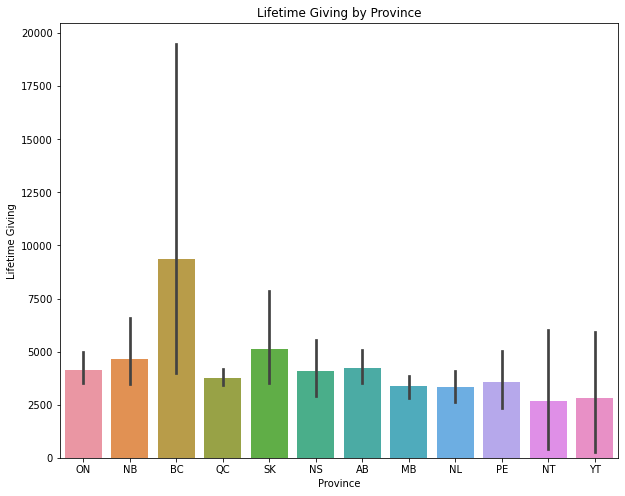

In [25]:
plt.figure(figsize=(10,8))
sns.barplot(data=data_wt,x='Province',y='Lifetime Giving')
plt.title("Lifetime Giving by Province")
plt.show()

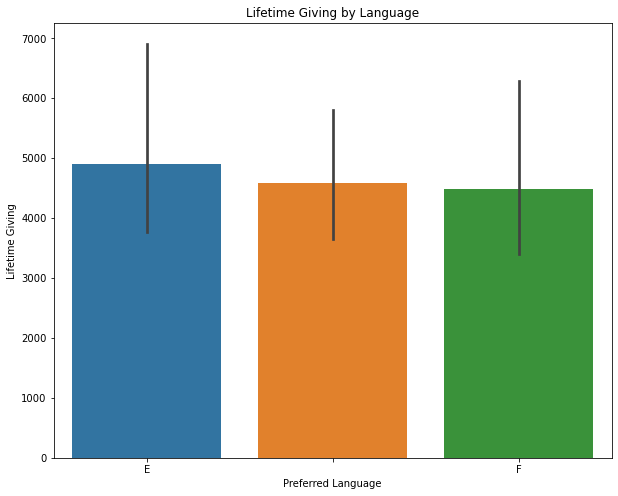

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(data=data_wt,x='Preferred Language',y='Lifetime Giving')
plt.title("Lifetime Giving by Language")
plt.show()

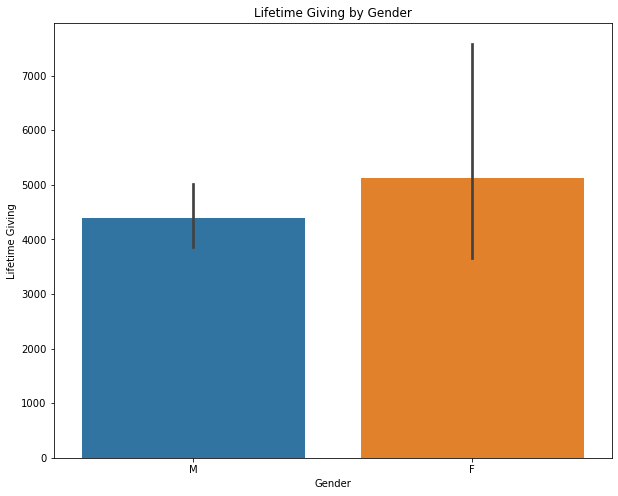

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(data=data_wt,x='Gender',y='Lifetime Giving')
plt.title("Lifetime Giving by Gender")
plt.show()

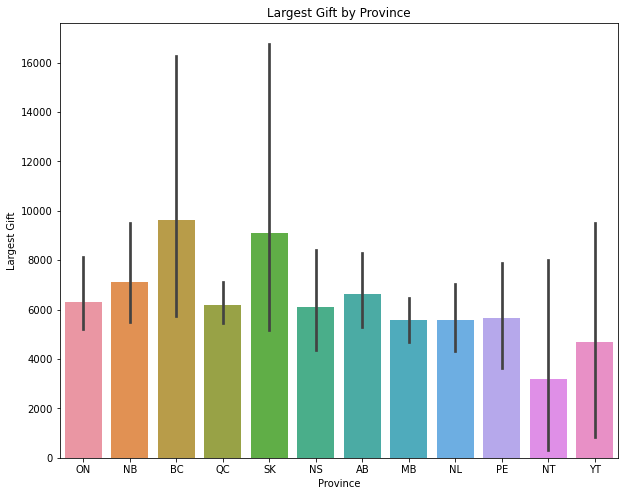

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(data=data_largegift,x='Province',y='Largest Gift')
plt.title("Largest Gift by Province")
plt.show()

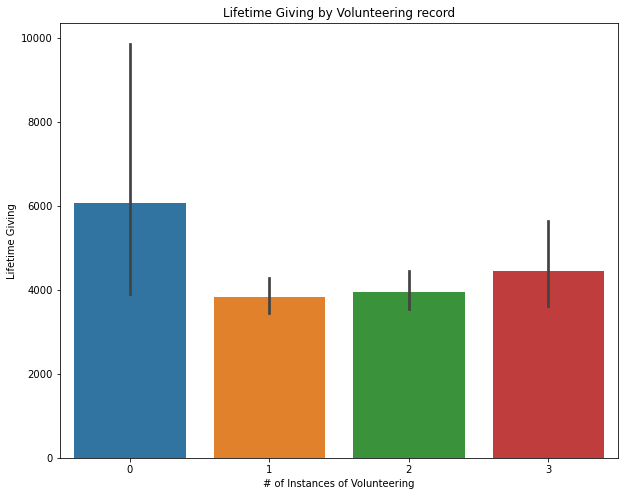

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(data=data_wt,x='# of Instances of Volunteering',y='Lifetime Giving')
plt.title("Lifetime Giving by Volunteering record")
plt.show()

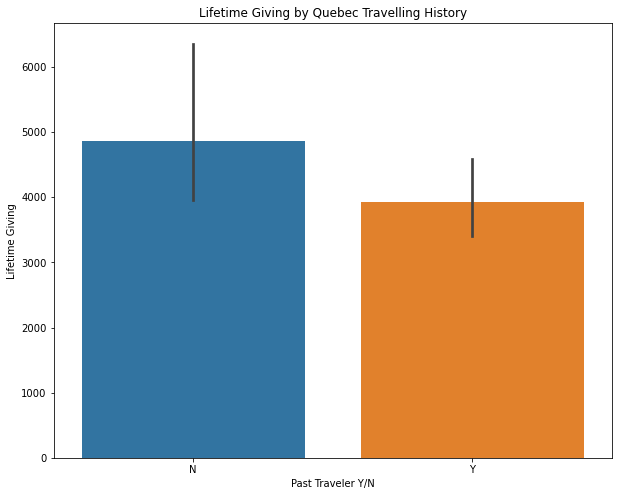

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(data=data_wt,x='Past Traveler Y/N',y='Lifetime Giving')
plt.title("Lifetime Giving by Quebec Travelling History")
plt.show()

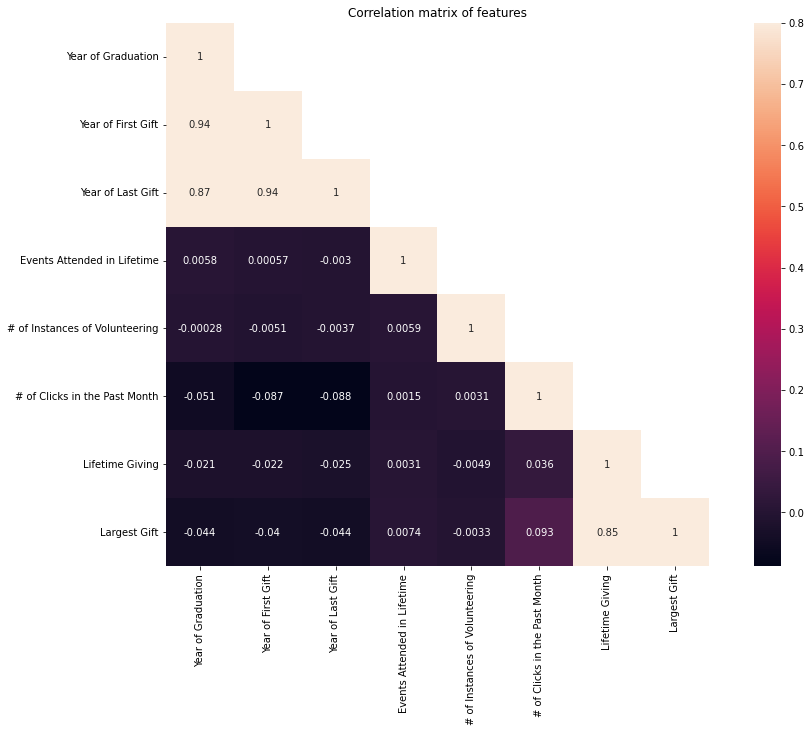

In [31]:
correMtrx=data_wt[['Year of Graduation','Year of First Gift','Year of Last Gift','Events Attended in Lifetime','# of Instances of Volunteering','# of Clicks in the Past Month','Lifetime Giving','Largest Gift']].corr()
#Above .corr() outputs the normal correlation matrix
#Below codes are for proper visualization
mask=np.array(correMtrx)
mask[np.tril_indices_from(mask)]=False #To plot a diagonal correlation matrix
fig,ax=plt.subplots(figsize=(16,10))
sns.heatmap(correMtrx,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
plt.title("Correlation matrix of features")
plt.show()

In [32]:
data_wt['Preferred Language'].value_counts()

E    32233
     10932
F     6826
Name: Preferred Language, dtype: int64

In [33]:
data_g=data_wt.copy()
data_g

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


In [34]:
data_2=data_g.groupby('Relationship Types')['Lifetime Giving'].mean()
print(data_2)

Relationship Types
Graduate                                                     4781.586480
Graduate, Current Parent                                     4088.870130
Graduate, Current Parent, Faculty/Staff                        47.500000
Graduate, Current Parent, Former Faculty/Staff               1619.000000
Graduate, Current Parent, Past Student                          0.000000
Graduate, Faculty/Staff                                      1757.063492
Graduate, Faculty/Staff, Past Student                           6.666667
Graduate, Former Faculty/Staff                               5964.653101
Graduate, Former Faculty/Staff, Past Student                 8192.885714
Graduate, Former Faculty/Staff, Student                      1227.250000
Graduate, Grandparent                                        2377.636364
Graduate, Grandparent, Former Faculty/Staff                     0.000000
Graduate, Grandparent, Past Parent                          22462.933333
Graduate, Grandparent, Past Pare

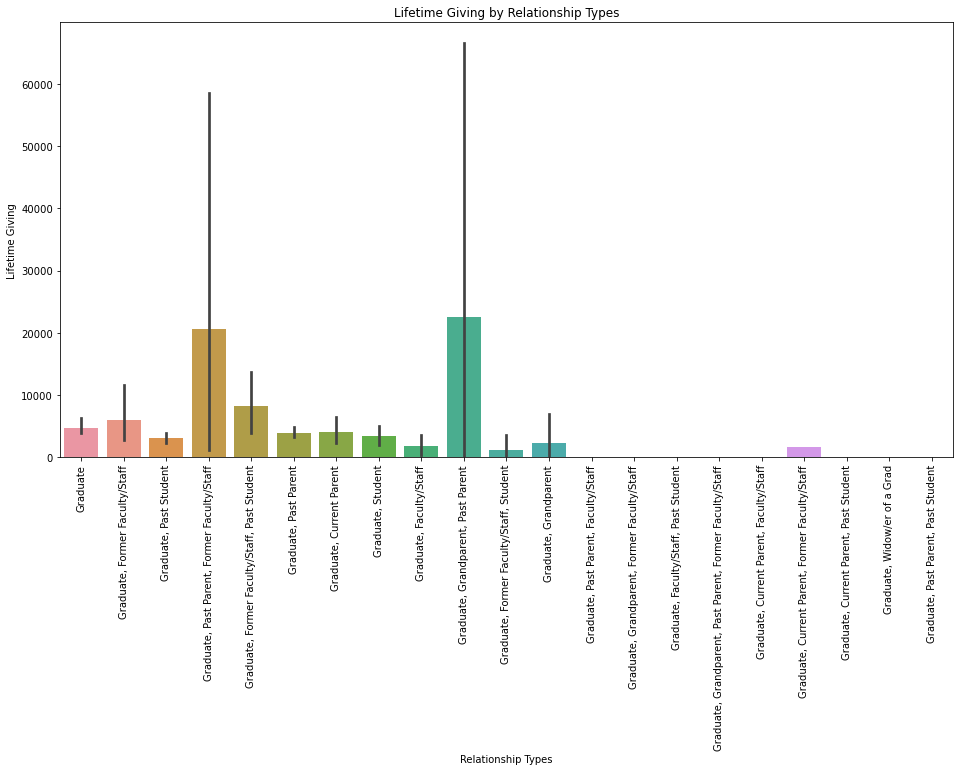

In [35]:
plt.figure(figsize=(16,8))
ax=sns.barplot(data=data_g,x='Relationship Types',y='Lifetime Giving')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Lifetime Giving by Relationship Types')
plt.show()

In [36]:
data_3=data_g.groupby('Faculty of Graduation')['Lifetime Giving'].mean()
print(data_3)

Faculty of Graduation
Agr&Env -- Dietetics                      3568.166667
Agr&Env -- General                        3581.287736
Agr&Env -- MSE                            3413.954545
Arts -- General                           4134.043557
Arts -- Information (Library) Studies     5922.147059
Arts -- MSE                               3359.270270
Arts -- Social Work                       3494.660487
Continuing Education                      2909.399340
Dentistry                                 4471.719298
Education -- General                      3595.988809
Engineer -- Architect                     5678.654160
Engineer -- General                       4823.936366
Engineer -- Urban                         4696.119048
Law                                       4713.198500
Management                                8884.288464
Medicine -- Com Sci                       1971.059406
Medicine -- General                       4570.459036
Medicine -- Nursing                       3408.372984
Medici

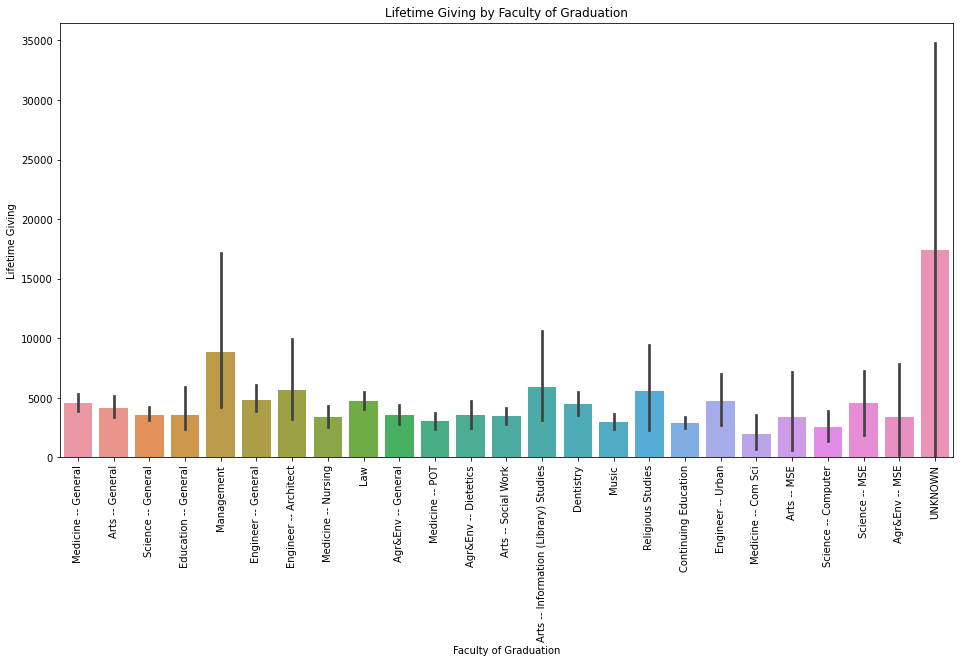

In [37]:
plt.figure(figsize=(16,8))
ax=sns.barplot(data=data_g,x='Faculty of Graduation',y='Lifetime Giving')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Lifetime Giving by Faculty of Graduation')
plt.show()

In [38]:
print(data_g['Faculty of Graduation'].value_counts()['UNKNOWN'])

2


### There are only two "UNKNOWN" entries in the "Faculty of Graduation" column, so we can disregard this and focus on other entries for our analysis. 

In [39]:
data_c=data_wt.copy()
data_c

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


### DECISION TREE CLASSIFICATION

In [138]:
def donation(x):
    if x==0:
        return 'No'
    else:
        return 'Yes'

In [140]:
data_don=data_wt.copy()

In [142]:
data_don['Donated?']=data_don['Lifetime Giving'].apply(lambda x: donation(x))
data_don

,ID Number,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donated?
0,100001,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27,Yes
1,100002,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19,Yes
2,100003,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18,Yes
3,100004,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10,Yes
4,100005,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1,Yes
49996,149997,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20,Yes
49997,149998,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5,No
49998,149999,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12,No


In [99]:
data_c=data_c[['Gender','Relationship Types','Faculty of Graduation','Province','Lifetime Giving','Events Attended in Lifetime','# of Instances of Volunteering','# of Clicks in the Past Month']]
data_c.head()

,Gender,Relationship Types,Faculty of Graduation,Province,Lifetime Giving,Events Attended in Lifetime,# of Instances of Volunteering,# of Clicks in the Past Month
0,M,Graduate,Medicine -- General,ON,73600,0,0,27
1,M,Graduate,Arts -- General,NB,8035,14,1,19
2,F,Graduate,Science -- General,ON,9675,15,1,18
3,M,Graduate,Education -- General,BC,4070,14,2,10
4,M,Graduate,Management,QC,13377,0,0,16


In [100]:
data_c.dropna(how='all',inplace=True)
data_c

C:\Users\tanmo\AppData\Local\Temp\ipykernel_19156\1974680772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c.dropna(how='all',inplace=True)


,Gender,Relationship Types,Faculty of Graduation,Province,Lifetime Giving,Events Attended in Lifetime,# of Instances of Volunteering,# of Clicks in the Past Month
0,M,Graduate,Medicine -- General,ON,73600,0,0,27
1,M,Graduate,Arts -- General,NB,8035,14,1,19
2,F,Graduate,Science -- General,ON,9675,15,1,18
3,M,Graduate,Education -- General,BC,4070,14,2,10
4,M,Graduate,Management,QC,13377,0,0,16
...,...,...,...,...,...,...,...,...
49995,M,Graduate,Engineer -- General,ON,9174,15,1,1
49996,F,Graduate,Arts -- General,MB,38181,8,1,20
49997,F,Graduate,Arts -- General,QC,0,3,2,5
49998,M,Graduate,Arts -- General,ON,0,1,0,12


In [101]:
ordinal_encoding_features=['Events Attended in Lifetime','# of Instances of Volunteering','# of Clicks in the Past Month']
one_hot_encoding_features=['Gender','Relationship Types','Faculty of Graduation','Province']

In [102]:
y=data_c['Lifetime Giving']
data_c.drop('Lifetime Giving',axis=1,inplace=True)

C:\Users\tanmo\AppData\Local\Temp\ipykernel_19156\1116040959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c.drop('Lifetime Giving',axis=1,inplace=True)


In [103]:
from sklearn import preprocessing

In [104]:
## create the encoder object 
label_encoder = sklearn.preprocessing.LabelEncoder()
## fit the encoder object and transform the data 
y_encoded = label_encoder.fit_transform(y)

In [105]:
print(y_encoded)

[7543 2375 2612 ...    0    0    0]


In [106]:
label_encoder.classes_

array([       0,        1,        2, ...,  5194433,  5327696, 29060880],
      dtype=int64)

In [107]:
## create the encoder object 
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
## fit the encoder object and transform the data 
data_c[ordinal_encoding_features] = ordinal_encoder.fit_transform(data_c[ordinal_encoding_features])

C:\Users\tanmo\AppData\Local\Temp\ipykernel_19156\478356833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c[ordinal_encoding_features] = ordinal_encoder.fit_transform(data_c[ordinal_encoding_features])


In [108]:
## create the encoder object 
one_hot_encoder = sklearn.preprocessing.OneHotEncoder()
## fit the encoder object and transform the data, save as encoded_columns
encoded_columns = one_hot_encoder.fit_transform(data_c[one_hot_encoding_features]).toarray()
## create names for the newly encoded features (this will use our original names + underscore + the binary category)
feature_names = one_hot_encoder.get_feature_names(one_hot_encoding_features)
## print out the feature_names so you understand what they represent 
## Your code here:
print(feature_names)
## convert encoded_columns to a dataframe 
encoded_columns_df = pd.DataFrame(encoded_columns, columns = feature_names)
## drop the old columns and append the new columns
partial_data = data_c.drop(one_hot_encoding_features, axis = 1)
data_encoded_fully = pd.concat([partial_data.reset_index(drop=True), encoded_columns_df.reset_index(drop=True)], axis = 1)

['Gender_F' 'Gender_M' 'Relationship Types_Graduate'
 'Relationship Types_Graduate, Current Parent'
 'Relationship Types_Graduate, Current Parent, Faculty/Staff'
 'Relationship Types_Graduate, Current Parent, Former Faculty/Staff'
 'Relationship Types_Graduate, Current Parent, Past Student'
 'Relationship Types_Graduate, Faculty/Staff'
 'Relationship Types_Graduate, Faculty/Staff, Past Student'
 'Relationship Types_Graduate, Former Faculty/Staff'
 'Relationship Types_Graduate, Former Faculty/Staff, Past Student'
 'Relationship Types_Graduate, Former Faculty/Staff, Student'
 'Relationship Types_Graduate, Grandparent'
 'Relationship Types_Graduate, Grandparent, Former Faculty/Staff'
 'Relationship Types_Graduate, Grandparent, Past Parent'
 'Relationship Types_Graduate, Grandparent, Past Parent, Former Faculty/Staff'
 'Relationship Types_Graduate, Past Parent'
 'Relationship Types_Graduate, Past Parent, Faculty/Staff'
 'Relationship Types_Graduate, Past Parent, Former Faculty/Staff'
 'Rel

C:\Users\tanmo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [109]:
print(data_c.shape)
print(data_encoded_fully.shape)

(49991, 7)
(49991, 63)


In [110]:
data_c[one_hot_encoding_features]

,Gender,Relationship Types,Faculty of Graduation,Province
0,M,Graduate,Medicine -- General,ON
1,M,Graduate,Arts -- General,NB
2,F,Graduate,Science -- General,ON
3,M,Graduate,Education -- General,BC
4,M,Graduate,Management,QC
...,...,...,...,...
49995,M,Graduate,Engineer -- General,ON
49996,F,Graduate,Arts -- General,MB
49997,F,Graduate,Arts -- General,QC
49998,M,Graduate,Arts -- General,ON


In [111]:
partial_data

,Events Attended in Lifetime,# of Instances of Volunteering,# of Clicks in the Past Month
0,0.0,0.0,27.0
1,14.0,1.0,19.0
2,15.0,1.0,18.0
3,14.0,2.0,10.0
4,0.0,0.0,16.0
...,...,...,...
49995,15.0,1.0,1.0
49996,8.0,1.0,20.0
49997,3.0,2.0,5.0
49998,1.0,0.0,12.0


In [112]:
encoded_columns_df

,Gender_F,Gender_M,Relationship Types_Graduate,"Relationship Types_Graduate, Current Parent","Relationship Types_Graduate, Current Parent, Faculty/Staff","Relationship Types_Graduate, Current Parent, Former Faculty/Staff","Relationship Types_Graduate, Current Parent, Past Student","Relationship Types_Graduate, Faculty/Staff","Relationship Types_Graduate, Faculty/Staff, Past Student","Relationship Types_Graduate, Former Faculty/Staff",...,Province_MB,Province_NB,Province_NL,Province_NS,Province_NT,Province_ON,Province_PE,Province_QC,Province_SK,Province_YT
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49986,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49987,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49988,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49989,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [113]:
data_encoded_fully

,Events Attended in Lifetime,# of Instances of Volunteering,# of Clicks in the Past Month,Gender_F,Gender_M,Relationship Types_Graduate,"Relationship Types_Graduate, Current Parent","Relationship Types_Graduate, Current Parent, Faculty/Staff","Relationship Types_Graduate, Current Parent, Former Faculty/Staff","Relationship Types_Graduate, Current Parent, Past Student",...,Province_MB,Province_NB,Province_NL,Province_NS,Province_NT,Province_ON,Province_PE,Province_QC,Province_SK,Province_YT
0,0.0,0.0,27.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,14.0,1.0,19.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.0,1.0,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,14.0,2.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,16.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49986,15.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49987,8.0,1.0,20.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49988,3.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49989,1.0,0.0,12.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [114]:
from sklearn.model_selection import train_test_split
## Fill in the below line of code: 
X_train, X_test, y_train, y_test = train_test_split(data_encoded_fully, y_encoded, test_size = 0.3, train_size = 0.7)

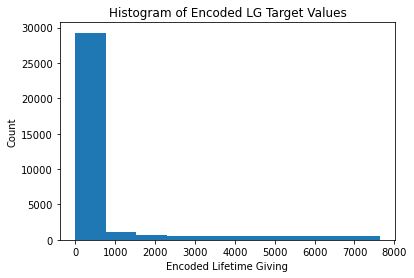

In [115]:
## Your code here: 
plt.hist(y_train)
plt.xlabel('Encoded Lifetime Giving')
plt.ylabel('Count')
plt.title('Histogram of Encoded LG Target Values')
plt.show()

In [116]:
from statistics import mode
## get the mode of the target variable
baseline = mode(y_train)
print('mode of target variable:', baseline)
## create a vector of length y_test where each entry is the mode of the target variable
baseline_pred = baseline * np.ones(len(y_test))
## print the accuracy of this baseline model 
print(round(sklearn.metrics.accuracy_score(baseline_pred, y_test)*100, 2))

mode of target variable: 0
67.74


In [117]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [118]:
print(dt_model.feature_importances_)
print(X_train.columns)

[2.60733915e-01 1.46236827e-01 2.29637387e-01 5.27682396e-02
 4.60003753e-02 9.26091601e-03 1.44371757e-03 1.01698620e-04
 0.00000000e+00 0.00000000e+00 7.02935975e-04 0.00000000e+00
 7.65098053e-03 5.46067620e-04 6.20430473e-05 1.39055328e-04
 0.00000000e+00 3.37616003e-04 0.00000000e+00 9.41109684e-03
 0.00000000e+00 7.66609674e-04 0.00000000e+00 5.06664059e-03
 1.89267578e-03 0.00000000e+00 3.04894061e-03 5.59784583e-03
 1.60427019e-04 2.24053167e-03 3.12989779e-03 3.28837443e-04
 3.93874439e-03 1.16661886e-03 1.78964613e-03 1.13800352e-03
 4.04469134e-03 4.79282740e-03 9.26620986e-04 5.44488710e-03
 1.20896973e-02 7.53553555e-04 5.48602097e-03 3.80476046e-03
 1.83881170e-03 8.18613320e-04 1.04402509e-03 3.31469277e-04
 5.67358406e-04 8.33077528e-04 7.40185013e-05 2.01429701e-02
 2.24117713e-02 1.19885389e-02 1.81198793e-02 6.43716401e-03
 1.30081011e-02 7.77392630e-04 2.83420758e-02 2.69200513e-03
 2.96150253e-02 7.86533674e-03 4.51016394e-04]
Index(['Events Attended in Lifetime', 

In [119]:
print('Tree depth: ', dt_model.get_depth())
print('Number of leaf nodes: ', dt_model.get_n_leaves())

Tree depth:  52
Number of leaf nodes:  17584


In [120]:
print('training set accuracy: ', round(dt_model.score(X_train, y_train) * 100, 2))

training set accuracy:  92.65


In [121]:
dt_model_predictions = dt_model.predict(X_test)
print(dt_model_predictions)
print(y_test)

[ 24  68   0 ... 219   0   0]
[2154 5156    0 ...    0 6276    0]


In [122]:
print('test set accuracy: ', round(dt_model.score(X_test, y_test)*100, 2))

test set accuracy:  47.36


In [123]:
max_depth = 7
dt_model_params = tree.DecisionTreeClassifier(max_depth = max_depth)
dt_model_params.fit(X_train, y_train)
## Your code here: print the tree depth 
print('Tree depth: ', dt_model_params.get_depth())
## Your code here: print the number of leaf nodes
print('Number of leaf nodes: ', dt_model_params.get_n_leaves())
## Your code here: print the accuracy on the trianing set 
print('training set accuracy: ', round(dt_model_params.score(X_train, y_train) * 100, 2))
## Your code here: print the accuracy on the test set 
print('test set accuracy: ', round(dt_model_params.score(X_test, y_test)*100, 2))

Tree depth:  7
Number of leaf nodes:  86
training set accuracy:  67.95
test set accuracy:  67.7


### Training with Gini Criterion

In [144]:
max_depth = 7
criterion = 'gini'
dt_model_params_gini = tree.DecisionTreeClassifier(max_depth = max_depth, criterion = criterion)
dt_model_params_gini.fit(X_train, y_train)
## Your code here: print the tree depth
print('Tree depth: ', dt_model_params_gini.get_depth())
## Your code here: print the number of leaf nodes 
print('Number of leaf nodes: ', dt_model_params_gini.get_n_leaves())
## Your code here: print the accuracy on the training set
print('training set accuracy: ', round(dt_model_params_gini.score(X_train, y_train) * 100, 2))
## Your code here: print the accuracy on the test set 
print('test set accuracy: ', round(dt_model_params_gini.score(X_test, y_test)*100, 2))

Tree depth:  7
Number of leaf nodes:  87
training set accuracy:  67.96
test set accuracy:  67.72


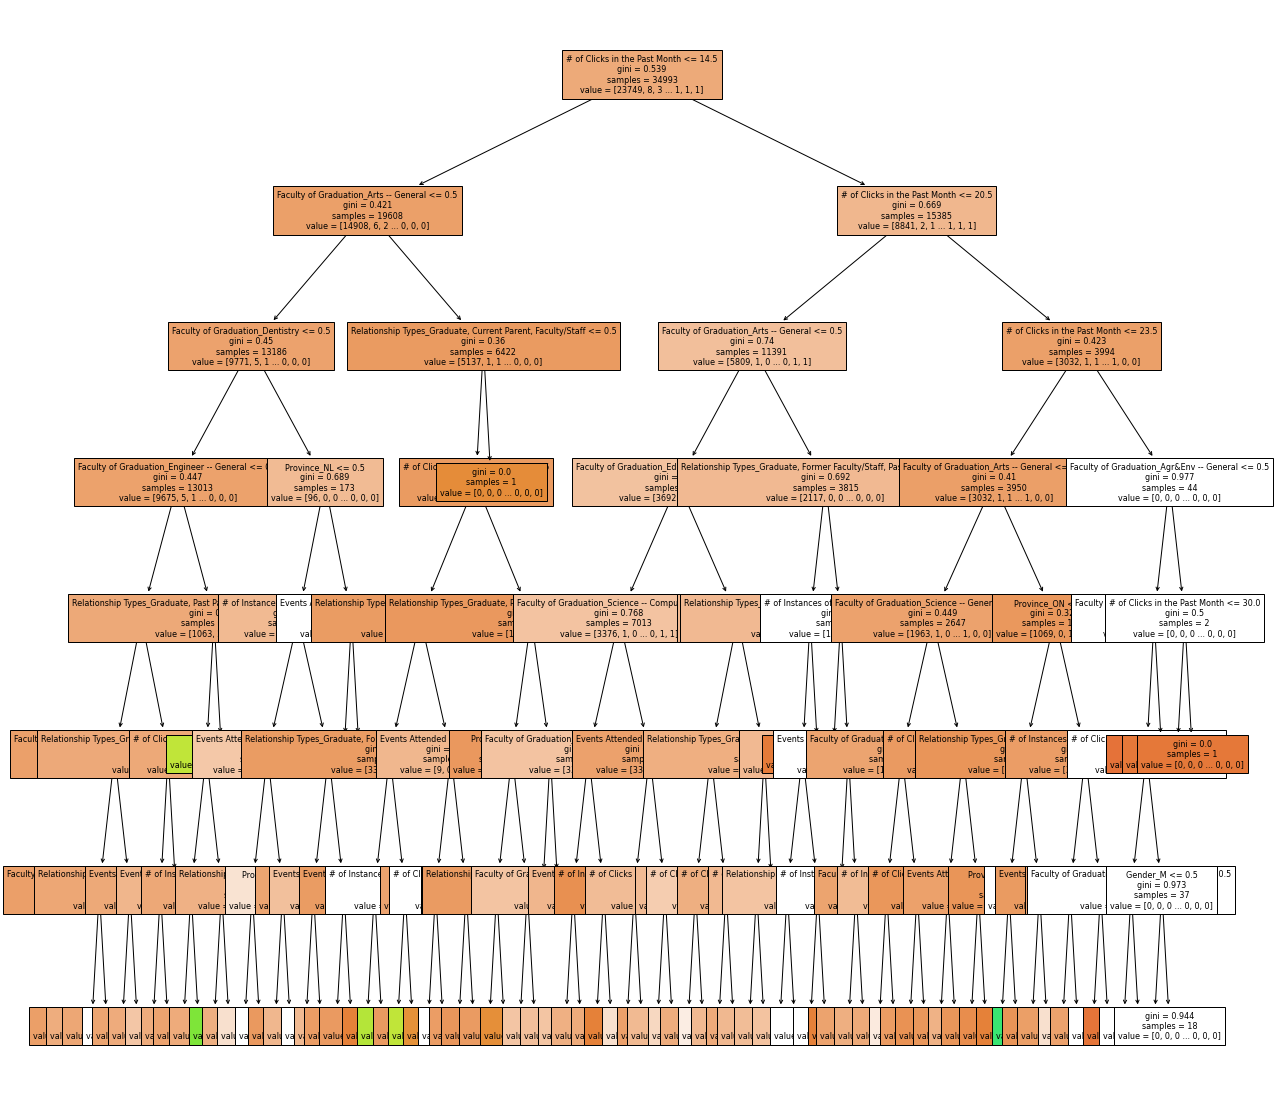

In [133]:
plt.figure(figsize=(20,20))
tree_plot = tree.plot_tree(dt_model_params_gini, fontsize = 8, feature_names = X_train.columns, filled = True, max_depth = 7)
plt.show()

In [192]:
import graphviz 

dot_data = tree.export_graphviz(dt_model_params_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=data_don['Donated?'],  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph.render('Donation')
'Donation.png'

'Donation.png'

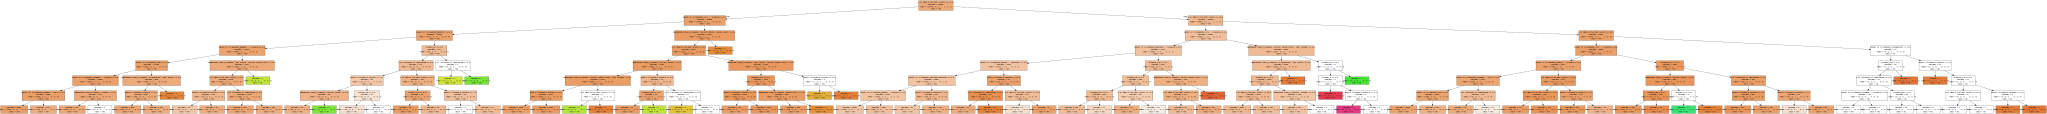

In [194]:
from sklearn.tree import export_graphviz
export_graphviz(dt_model_params_gini,out_file='tree.dot',class_names=data_don['Donated?'],feature_names=X_train.columns,impurity=False,filled=True)
with open ('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

## RANDOM FOREST

In [201]:
from sklearn.ensemble import RandomForestClassifier

max_depth = 7
criterion = 'gini'
n_estimators = 150
## Your code here: define the RandomForestClassifier object with all parameters
dt_model_rf = RandomForestClassifier(max_depth = max_depth, criterion = criterion, n_estimators = n_estimators)
## Your code here: fit and transform the data 
dt_model_rf.fit(X_train, y_train)
## Your code here: print the training and testing accuracy (hint: use the above code to support you in doing this)
print('training set accuracy: ', round(dt_model_rf.score(X_train, y_train) * 100, 2))
print('test set accuracy: ', round(dt_model_rf.score(X_test, y_test)*100, 2))

training set accuracy:  67.87
test set accuracy:  67.74


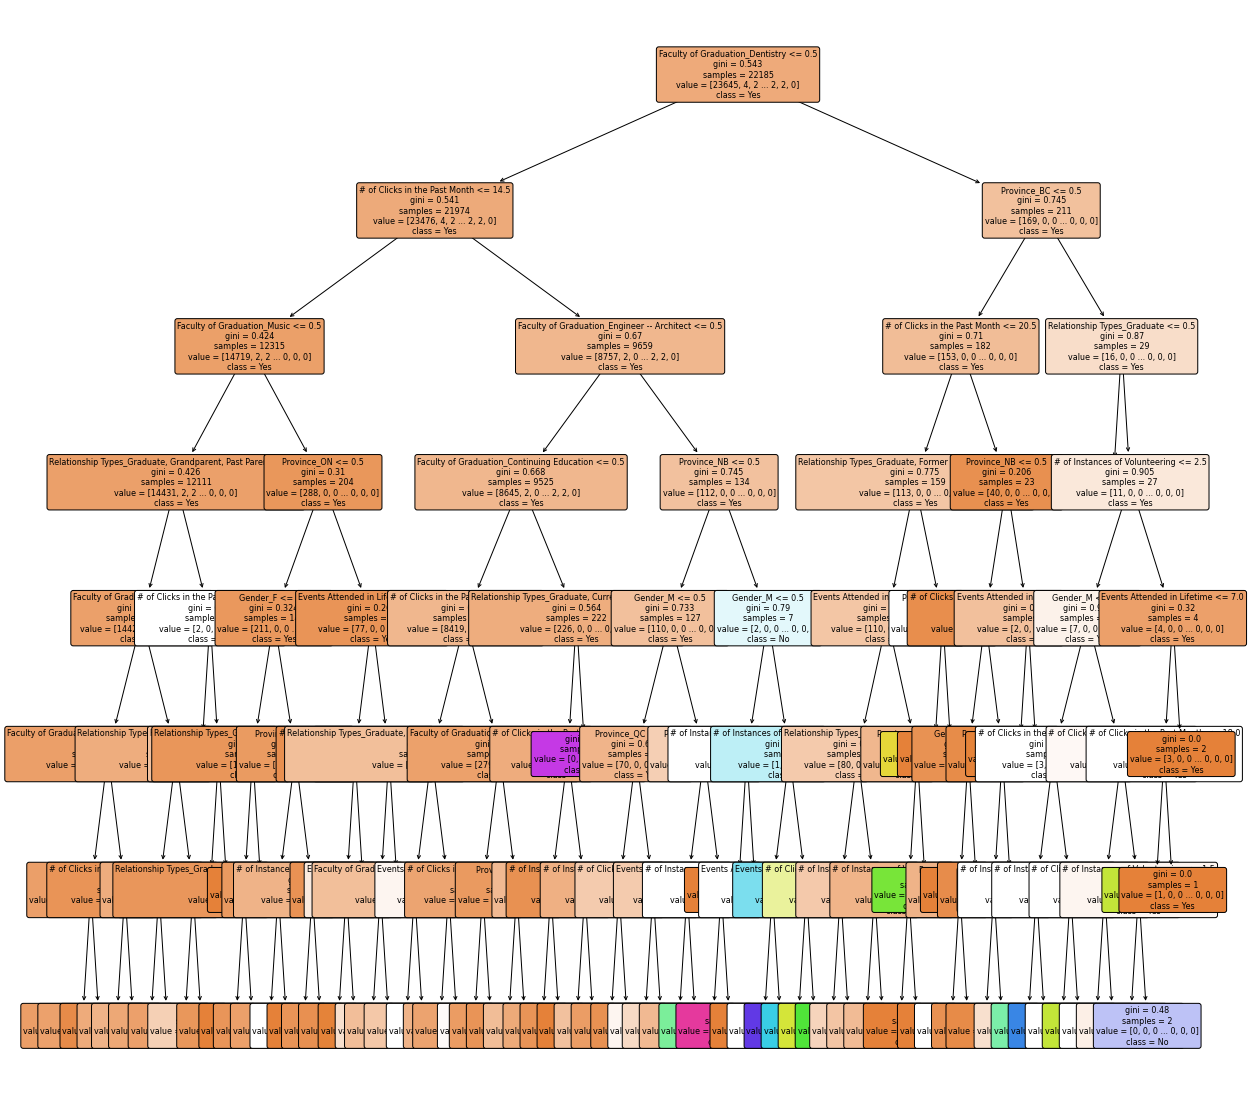

In [203]:
#Now we will plot decision tree number 51, whose n_estimator index is 50. 

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20, 20))
plot_tree(dt_model_rf.estimators_[50], fontsize=8,
          feature_names=X_train.columns,
          class_names=data_don['Donated?'], 
          filled=True, impurity=True, 
          rounded=True)
plt.show()

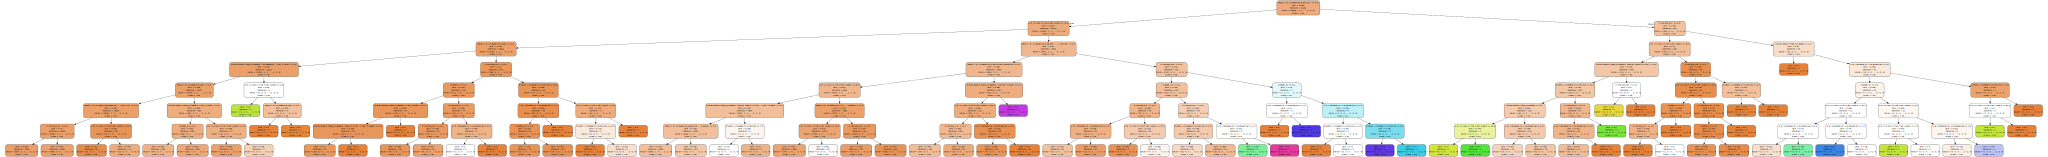

In [204]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt_model_rf.estimators_[50], 
                           feature_names=X_train.columns,
                           class_names=data_don['Donated?'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

In [208]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt_model_rf.estimators_[50], 
                           feature_names=X_train.columns,
                           class_names=data_don['Donated?'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='pdf')
graph.render('Random Forest 50')
'Random Forest 50'

'Random Forest 50'

In [210]:
#Let us change the Max_depth and number of estimators (Decision Trees) and see the result
from sklearn.ensemble import RandomForestClassifier

max_depth = 8
criterion = 'gini'
n_estimators = 150
## Your code here: define the RandomForestClassifier object with all parameters
dt_model_rf = RandomForestClassifier(max_depth = max_depth, criterion = criterion, n_estimators = n_estimators)
## Your code here: fit and transform the data 
dt_model_rf.fit(X_train, y_train)
## Your code here: print the training and testing accuracy (hint: use the above code to support you in doing this)
print('training set accuracy: ', round(dt_model_rf.score(X_train, y_train) * 100, 2))
print('test set accuracy: ', round(dt_model_rf.score(X_test, y_test)*100, 2))

training set accuracy:  67.87
test set accuracy:  67.74


In [211]:
#We can see that the accuracy remains close.

In [212]:
y_pred_gini = dt_model_params_gini.predict(X_test)

In [219]:
from sklearn.metrics import accuracy_score

print('Model or test set accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model or test set accuracy score with criterion gini index: 0.6772


### CONFUSION MATRIX

In [215]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[10156     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]
 [    2     0     0 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


### CLASSIFICATION REPORT

In [217]:
y_pred_train_gini = dt_model_params_gini.predict(X_train)
y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [218]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6796


#### Training set accuracy score is 0.6796 and test set accuracy score is 0.6772. These two values are quite comparable, so there is no sign of overfitting.

In [220]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81     10160
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        33
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        77
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        46
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00       144
          20       0.00      0.00      0.00         3
          23       0.00      0.00      0.00         1
          24       0.00    

C:\Users\tanmo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tanmo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tanmo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tanmo\anaconda3\lib\site-packages\sklearn\metrics\_cla